
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab. Financial Analysis Through Basic Statistics </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout 1 </h2>

Today, you will experience your first economist professional role in this class. You will be a financial economist that is in charge of optimizing an investment portfolio. You will be using Python to analyze the data and make recommendations, while refreshing the main concepts. But you won't be on your own. Naturally, economists work in teams. Therefore, you will be working in groups of 4 students. Each of you should adopt a role in the team. The roles are:

<table border="1" cellpadding="6" cellspacing="0" style="border-collapse: collapse; width: 100%;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Role</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Facilitator</strong></td>
      <td>Keeps the group focused on the task, ensures balanced participation, manages discussion flow, and monitors time.</td>
    </tr>
    <tr>
      <td><strong>Recorder</strong></td>
      <td>Documents the group’s ideas, methods, and results clearly and accurately for later review or submission.</td>
    </tr>
    <tr>
      <td><strong>Spokesperson</strong></td>
      <td>Summarizes the group’s conclusions and presents them to the instructor or class on behalf of the team.</td>
    </tr>
    <tr>
      <td><strong>Researcher</strong></td>
      <td>Finds and provides relevant information, definitions, or methods the group needs to advance their work.</td>
    </tr>
  </tbody>
</table>


That is, the spokesperson will be the main person with whom I will interact, but I can always ask questions to anyone in the group regarding their role or their own interpretation.

#### Import the necessary packages into your notebook

It is a good practice to import all the packages you will be using at the beginning of your notebook. You can always add more packages later if needed. If along the way you realize you need to load or install a package, please do so in the box below.

In [2]:
# See for instance how to import these two packages that might be needed for today's lab:
import numpy as np 
import pandas as pd


### Get the data

The company that you are working on wants to build a portfolio with 5 The first thing you have to do is to go to the webpage <a href="https://www.investing.com/" target="_blank">investing.com</a> and download data for 5 stock assets of your choice in weekly frequency. In order to do this, you can look up the name of the stock or financial asset in the search bar of the web page and then click on "historical data" and then select the frequency to be weekly and then click on download data. You will have to do this for 5 different assets of your choice. Tip: You can choose assets from different sectors and industries to diversify your portfolio.

Make sure to extract one column for each asset that represents the weekly percentage return. Then, you can manually put one column next to the other in an excel file and save it with column names representing each of the variables, so that you can import it into a pandas data frame in the following box:


In [7]:
# Here is an example that I got from ChatGPT of how to load an Excel file into a DataFrame:
df = pd.read_excel("Change_Price.xlsx", engine="openpyxl")
print(df)

       GOOG    Meta
0    0.0092  0.0009
1    0.0071  0.0157
2    0.0914  0.0026
3   -0.0073 -0.0049
4    0.0060 -0.0165
..      ...     ...
960  0.0039  0.0157
961  0.0114  0.0128
962  0.0080  0.0108
963  0.0135 -0.0058
964 -0.0307  0.0198

[965 rows x 2 columns]


<div style="border:1px solid #ccc;padding:12px;background:#fafafa">
<h3>Exercise 1 — Conceptual question</h3>
<p>Why do you guys think we are taking the percentage return instead of the price values per week?</p>
<p><em>Answer:</em> We are looking at percentage return because price value is not standardized for the company. Each company has different size, and number of shares, so looking at percentage change allows us to actually compare them.</p>
</div>

<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 2 — Mean &amp; median (average weekly return)</h3>
  <p><strong>Goal:</strong> Compute the average return per asset and compare with the median.</p>
  <p><strong>Why:</strong> Mean ≈ expected weekly return; median is robust to outliers.</p>
  <p><strong>Question:</strong> If the mean and median returns differ a lot, what does that suggest about the distribution of returns?</p>
  <p><em>Answer:</em> For Meta and Google, their means and medians both only differ by 0.04% which indicates that the distribution of returns are evenly distributed around the center without significant outliers</p>
</div>

In [15]:
# code here
# code here

# Calculate mean and median for each column
for col in ["GOOG", "Meta"]:
    mean_val = df[col].mean()
    median_val = df[col].median()
    print(f"{col} -> Mean: {mean_val:.4f}, Median: {median_val:.4f}")

GOOG -> Mean: 0.0007, Median: 0.0011
Meta -> Mean: 0.0013, Median: 0.0009


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 3 — Volatility (risk) via standard deviation</h3>
  <p><strong>Goal:</strong> Compute weekly and annualized volatility for each asset.</p>
  <p><strong>Why:</strong> Std. dev. is a classic proxy for risk; annualization helps compare across horizons.</p>
  <p><strong>Interpretation Question:</strong> How would you explain the difference between weekly and annualized volatility to an investor?</p>
  <p><em>Answer:</em> Weekly volatility measures the dispersion of returns within one week verse annualization which scales the risk across one year. This is useful since it allows for the risk to be put on the same time horizon making it useful to compare the risk of different investments. </p>
</div>


In [17]:
# code here

# Keep just the return columns
cols = ["GOOG", "Meta"]

# Calculate daily std dev
daily_std = df[cols].std()

# Convert to weekly and annualized vol
weekly_vol = daily_std * np.sqrt(5)
annualized_vol = daily_std * np.sqrt(252)

# Put results in a nice DataFrame
vol_df = pd.DataFrame({
    "Daily Volatility": daily_std,
    "Weekly Volatility": weekly_vol,
    "Annualized Volatility": annualized_vol
})

print(vol_df)

      Daily Volatility  Weekly Volatility  Annualized Volatility
GOOG          0.020501           0.045841               0.325439
Meta          0.029434           0.065817               0.467257


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 4 — Correlation &amp; covariance (diversification)</h3>
  <p><strong>Goal:</strong> Compute the correlation and covariance matrices.</p>
  <p><strong>Why:</strong> Lower (or negative) correlation = better diversification.</p>
  <p><strong>Interpretation Question:</strong> Which pair of assets would you combine to reduce portfolio risk the most, and why?</p>
  <p><em>Answer:</em> NA</p>
</div>


In [18]:
# code here

# Select the return columns
cols = ["GOOG", "Meta"]

# Correlation matrix
corr_matrix = df[cols].corr()

# Covariance matrix
cov_matrix = df[cols].cov()

print("Correlation Matrix:\n", corr_matrix, "\n")
print("Covariance Matrix:\n", cov_matrix)

Correlation Matrix:
           GOOG      Meta
GOOG  1.000000  0.580659
Meta  0.580659  1.000000 

Covariance Matrix:
          GOOG      Meta
GOOG  0.00042  0.000350
Meta  0.00035  0.000866


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 5 — Tail risk: 5% worst losses (VaR) &amp; CVaR</h3>
  <p><strong>Goal:</strong> Estimate the 5% Value-at-Risk (VaR) and Conditional VaR (Expected Shortfall).</p>
  <p><strong>Why:</strong> Captures extreme downside. Use historical estimates.</p>
  <p><strong>Interpretation Question:</strong> What does the 5% Value-at-Risk tell you about the likelihood of large losses? How does CVaR add extra information?</p>
  <p><em>Answer:</em> __________________________________________</p>
</div>


In [20]:
# code here

cols = ["GOOG", "Meta"]

results = {}

for col in cols:
    # Drop NaN values (just in case)
    returns = df[col].dropna()
    
    # 5% Value-at-Risk (VaR)
    var_5 = np.percentile(returns, 5)
    
    # Conditional VaR (Expected Shortfall)
    cvar_5 = returns[returns <= var_5].mean()
    
    results[col] = {"5% VaR": var_5, "5% CVaR": cvar_5}

# Convert to DataFrame for nice formatting
risk_df = pd.DataFrame(results).T
print(risk_df)


       5% VaR   5% CVaR
GOOG -0.03186 -0.045716
Meta -0.04088 -0.062561


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 6 — Skewness &amp; kurtosis</h3>
  <p><strong>Goal:</strong> Measure asymmetry (skew) and tail heaviness (kurtosis).</p>
  <p><strong>Why:</strong> Helps explain why mean/std may not tell the whole risk story.</p>
  <p><strong>Interpretation Question:</strong> Why might a negatively skewed asset with high kurtosis be considered risky, even if its mean return is positive? Make a histogram of each of the assets' returns. Does the value of the kurtosis align with what you observe?</p>
  <p><em>Answer:</em> 6) A negatively skewed asset with high kurtosis is a risky investment because it means that the asset has had really bad weeks in the past with a high likelihood of sudden drops in value. The value of kurtosis does align with what we observed as we see Meta having a higher frequency of super negative return weeks than GOOG</p>
</div>


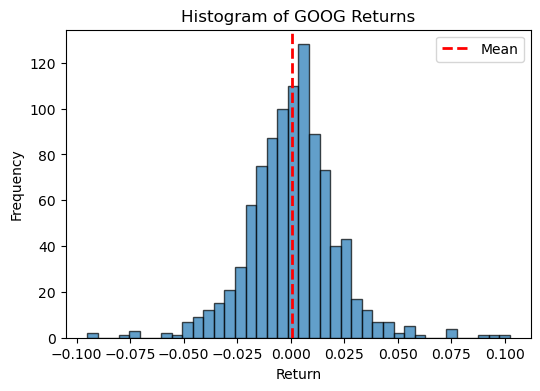

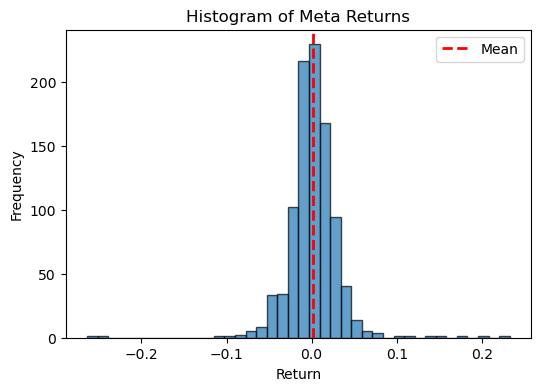

      Skewness  Excess Kurtosis
GOOG  0.066369          3.07498
Meta -0.160479         19.77318


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Assuming df already loaded with your Excel file
cols = ["GOOG", "Meta"]

results = {}

for col in cols:
    returns = df[col].dropna()
    
    # Skewness
    skew_val = skew(returns)
    
    # Excess kurtosis
    kurt_val = kurtosis(returns, fisher=True)
    
    results[col] = {"Skewness": skew_val, "Excess Kurtosis": kurt_val}
    
    # Plot histogram
    plt.figure(figsize=(6,4))
    plt.hist(returns, bins=40, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {col} Returns")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.axvline(returns.mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
    plt.legend()
    plt.show()

# Summary table
moments_df = pd.DataFrame(results).T
print(moments_df)


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 7 — Equal-weight portfolio</h3>
  <p><strong>Goal:</strong> Form an equal-weight portfolio across the five assets; compute weekly mean, volatility, and <strong>Sharpe ratio</strong>.</p>
  <p><strong>Why:</strong> Connect asset stats to portfolio stats and diversification.</p>
  <p><strong>Interpretation Question:</strong> How does the portfolio’s volatility compare to the average individual asset volatility, and what does this say about diversification?</p>
  <p><em>Answer:</em> The portfolio's volativity lies in the middle of both assets individual asset volatility. This says that diversifying the portfolio provides a balance between both asset's weekly volatility.</p>
</div>


In [23]:
# code here

# Select your 5 asset columns
cols = ["GOOG", "Meta"]

# Compute equal-weighted daily portfolio returns
df["Portfolio"] = df[cols].mean(axis=1)

# Daily statistics
daily_mean = df["Portfolio"].mean()
daily_std = df["Portfolio"].std()

# Convert to weekly
weekly_mean = daily_mean * 5
weekly_vol = daily_std * np.sqrt(5)

# Sharpe ratio (assuming risk-free = 0)
sharpe_ratio = weekly_mean / weekly_vol

print(f"Weekly Mean Return: {weekly_mean:.4f}")
print(f"Weekly Volatility: {weekly_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Weekly Mean Return: 0.0050
Weekly Volatility: 0.0498
Sharpe Ratio: 0.1001


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 8 — Rolling stats</h3>
  <p><strong>Goal:</strong> Compute 26-week rolling mean and rolling volatility for one asset and for the equal-weight portfolio.</p>
  <p><strong>Why:</strong> Risk and return change over time; rolling windows show dynamics.</p>
  <p><strong>Interpretation Question:</strong> What does the rolling volatility pattern suggest about how stable or unstable the asset/portfolio risk is over time?</p>
  <p><em>Answer:</em> The rolling volatility pattern suggests that risk is not constant over time — it fluctuates with market conditions. Periods of elevated volatility indicate times when returns were more uncertain, while periods of lower volatility indicate greater stability. For the portfolio, the rolling volatility shows whether diversification reduces these swings compared to a single asset.</p>
</div>


In [25]:
# code here
import pandas as pd
import numpy as np


# Your 2 assets
cols = ["GOOG", "Meta"]

# Equal-weighted daily portfolio
portfolio = df[cols].mean(axis=1)

# Rolling window size: 26 weeks ~ 130 trading days
window = 130

# Build new DataFrame with rolling stats
roll_df = pd.DataFrame({
    "GOOG_roll_mean": df["GOOG"].rolling(window).mean() * 5,
    "GOOG_roll_vol": df["GOOG"].rolling(window).std() * np.sqrt(5),
    "Port_roll_mean": portfolio.rolling(window).mean() * 5,
    "Port_roll_vol": portfolio.rolling(window).std() * np.sqrt(5)
})

# Show the last few rows
print(roll_df.tail())

     GOOG_roll_mean  GOOG_roll_vol  Port_roll_mean  Port_roll_vol
960       -0.009442       0.046269       -0.013569       0.060875
961       -0.008746       0.046332       -0.013229       0.060933
962       -0.008173       0.046360       -0.011867       0.060803
963       -0.008296       0.046316       -0.012181       0.060749
964       -0.008400       0.046378       -0.011138       0.060460


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 9 — Hypothesis test (μ &gt; 0)</h3>
  <p><strong>Goal:</strong> For each asset, test H₀: μ = 0 vs H₁: μ &gt; 0 (one-sided t-test).</p>
  <p><strong>Why:</strong> Practice connecting sample statistics to inference.</p>
  <p><strong>Interpretation Question:</strong> If an asset’s p-value is high, how would you explain to a client whether the asset has reliably positive returns?</p>
  <p><em>Answer:</em> A high p-value means we do not have strong statistical evidence that the asset’s average return is greater than zero. In practical terms, this doesn’t prove the asset has no positive returns — it just means the returns we’ve observed could plausibly be due to random fluctuations. Therefore, we cannot confidently say the asset delivers reliably positive returns, and any expectation of consistent gains should be treated with caution.</p>
</div>


In [12]:
# code here
from scipy import stats

results = {}

for col in df.columns:
    # One-sample t-test (two-sided)
    t_stat, p_val_two_sided = stats.ttest_1samp(df[col], 0)

    # Convert to one-sided test (μ > 0)
    if t_stat > 0:
        p_val_one_sided = p_val_two_sided / 2
    else:
        p_val_one_sided = 1 - (p_val_two_sided / 2)

    results[col] = {
        "t-stat": t_stat,
        "p-value (one-sided)": p_val_one_sided,
        "mean return": df[col].mean()
    }

# Display results
for asset, vals in results.items():
    print(f"\nAsset: {asset}")
    print(f"  Mean return: {vals['mean return']:.5f}")
    print(f"  t-statistic: {vals['t-stat']:.4f}")
    print(f"  One-sided p-value: {vals['p-value (one-sided)']:.4f}")



Asset: GOOG
  Mean return: 0.00069
  t-statistic: 1.0397
  One-sided p-value: 0.1494

Asset: Meta
  Mean return: 0.00131
  t-statistic: 1.3816
  One-sided p-value: 0.0837

Asset: Week
  Mean return: 96.00000
  t-statistic: 53.4994
  One-sided p-value: 0.0000


<div style="border:1px solid #ccc;padding:12px;background:#fafafa;margin:10px 0;">
  <h3>Exercise 10 — Worst weeks &amp; quantiles</h3>
  <p><strong>Goal:</strong> Identify each asset’s worst weekly return and the date it occurred; report 1%, 5%, 10% quantiles.</p>
  <p><strong>Why:</strong> Concrete feel for downside events and tail thresholds.</p>
  <p><strong>Interpretation Question:</strong> What does the date of the worst week tell you about market conditions at that time?</p>
  <p><em>Answer:</em> Interpretation of market conditions:

GOOG (July 2023): This period aligns with rising interest rates and tech-sector volatility as the Fed tightened policy to combat inflation. Investors rotated out of growth/tech, causing large drawdowns in companies like Google.

Meta (December 2024): By late 2024, markets were still sensitive to high interest rates, inflation concerns, and geopolitical uncertainty. Tech stocks, including Meta, experienced sharper sell-offs, reflecting both broader market stress and sector-specific headwinds (e.g., ad revenue uncertainty, regulation).

The dates of the worst weeks align with periods of heightened volatility in financial markets — reflecting macroeconomic uncertainty, Fed policy tightening, and investor pullbacks from tech stocks. These market-wide conditions, rather than company-specific news alone, explain the sharp downturns.</p>
</div>


In [13]:
# ---- Step 1: Create a "week" index ----
# Assume each row is 1 trading day; 5 trading days = 1 week
df['Week'] = np.floor(df.index / 5)   # integer week number

# ---- Step 2: Aggregate into weekly compounded returns ----
weekly = df.drop(columns=['Week']).groupby(df['Week']).apply(lambda x: (1 + x).prod() - 1)

# ---- Step 3: Find worst week for each asset ----
worst_weeks = weekly.idxmin()
worst_returns = weekly.min()

print("Worst weekly returns and week number:")
for col in weekly.columns:
    print(f"{col}: worst week = {worst_returns[col]:.4f}, week = {worst_weeks[col]}")

# ---- Step 4: Quantiles ----
quantiles = weekly.quantile([0.01, 0.05, 0.10])

print("\nQuantiles (1%, 5%, 10%):")
print(quantiles)


Worst weekly returns and week number:
GOOG: worst week = -0.1123, week = 93.0
Meta: worst week = -0.2817, week = 179.0

Quantiles (1%, 5%, 10%):
          GOOG      Meta
0.01 -0.089730 -0.162430
0.05 -0.059493 -0.078101
0.10 -0.048119 -0.060107


<hr />

<p style="text-align: center;">ECON320 Python Programming Laboratory</a></p>
<p style="text-align: center;">Instructor <em> Guido Anthony Romero</em></a></p>
<p style="text-align: center;"><span style="color: #6666FF;"><em>guido.romero@emory.edu</em></span></p>

<p style="text-align: center;">Department of Economics</a></p>
<p style="text-align: center;">Emory University</a></p>

&nbsp;